In [36]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv('US_Accidents_March23.csv', nrows = 1000000)

In [37]:
df.drop(['ID','Source','Start_Time','End_Time','Start_Lat','Start_Lng','End_Lat','End_Lng',
        'Description','Street','Country','Timezone','Airport_Code','Weather_Timestamp','Turning_Loop'], axis=1, inplace=True)

In [38]:
df.sample(5)

,Severity,Distance(mi),City,County,State,Zipcode,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
408370,3,0.01,Long Beach,Los Angeles,CA,90805,62.1,NaN,90.0,29.89,6.0,SSE,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
178182,2,0.00,Roselle,Dupage,IL,60172-3349,73.0,NaN,59.0,29.98,10.0,WNW,11.5,NaN,Overcast,False,False,True,False,False,True,False,False,False,False,False,True,Day,Day,Day,Day
565062,1,0.00,Houston,Harris,TX,77071,83.0,83.0,82.0,29.84,10.0,SW,5.0,0.0,Partly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
849284,2,0.00,Sebastopol,Sonoma,CA,95472-3055,71.0,71.0,24.0,29.90,10.0,S,5.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
717451,3,0.00,Andover,Essex,MA,01810,29.0,23.0,61.0,30.47,10.0,N,6.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [39]:
df.shape

(1000000, 31)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Severity               1000000 non-null  int64  
 1   Distance(mi)           1000000 non-null  float64
 2   City                   999972 non-null   object 
 3   County                 1000000 non-null  object 
 4   State                  1000000 non-null  object 
 5   Zipcode                999864 non-null   object 
 6   Temperature(F)         984702 non-null   float64
 7   Wind_Chill(F)          539411 non-null   float64
 8   Humidity(%)            983447 non-null   float64
 9   Pressure(in)           987624 non-null   float64
 10  Visibility(mi)         981069 non-null   float64
 11  Wind_Direction         986430 non-null   object 
 12  Wind_Speed(mph)        899602 non-null   float64
 13  Precipitation(in)      524684 non-null   float64
 14  Weather_Condition  

In [41]:
## Separating into cat, num, bool variables

df_cat = [i for i in df.columns if df[i].dtype=='object']
df_num = [i for i in df.columns if df[i].dtype!='object' and df[i].dtype != 'bool' and i!='Severity']
df_bool = [i for i in df.columns if df[i].dtype == 'bool']

In [42]:
df_cat

['City',
 'County',
 'State',
 'Zipcode',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [43]:
df_num

['Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [44]:
df_bool

['Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal']

In [45]:
## Missing values in int

missing_percent_int = df[df_num].isnull().mean() * 100

missing_data_int = missing_percent_int[missing_percent_int > 0]
missing_data_int = missing_data_int.sort_values(ascending=False)

In [46]:
missing_data_int

Precipitation(in)    47.5316
Wind_Chill(F)        46.0589
Wind_Speed(mph)      10.0398
Visibility(mi)        1.8931
Humidity(%)           1.6553
Temperature(F)        1.5298
Pressure(in)          1.2376
dtype: float64

In [47]:
## Missing values in categorical

missing_percent_obj = df[df_cat].isnull().mean() * 100

missing_data_obj = missing_percent_obj[missing_percent_obj > 0]
missing_data_obj = missing_percent_obj.sort_values(ascending=False)

In [48]:
missing_data_obj

Weather_Condition        1.8211
Wind_Direction           1.3570
Sunrise_Sunset           0.1636
Civil_Twilight           0.1636
Nautical_Twilight        0.1636
Astronomical_Twilight    0.1636
Zipcode                  0.0136
City                     0.0028
County                   0.0000
State                    0.0000
dtype: float64

In [49]:
## Missing values in categorical

missing_percent_bool = df[df_bool].isnull().mean() * 100

missing_percent_bool = missing_percent_bool[missing_percent_bool > 0]
missing_percent_bool = missing_percent_bool.sort_values(ascending=False)

In [50]:
missing_percent_bool

Series([], dtype: float64)

In [51]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [52]:
df[df_cat].head()

,City,County,State,Zipcode,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Dayton,Montgomery,OH,45424,Calm,Light Rain,Night,Night,Night,Night
1,Reynoldsburg,Franklin,OH,43068-3402,Calm,Light Rain,Night,Night,Night,Day
2,Williamsburg,Clermont,OH,45176,SW,Overcast,Night,Night,Day,Day
3,Dayton,Montgomery,OH,45417,SW,Mostly Cloudy,Night,Day,Day,Day
4,Dayton,Montgomery,OH,45459,SW,Mostly Cloudy,Day,Day,Day,Day


In [53]:
df[df_num].head()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.01,36.9,NaN,91.0,29.68,10.0,NaN,0.02
1,0.01,37.9,NaN,100.0,29.65,10.0,NaN,0.00
2,0.01,36.0,33.3,100.0,29.67,10.0,3.5,NaN
3,0.01,35.1,31.0,96.0,29.64,9.0,4.6,NaN
4,0.01,36.0,33.3,89.0,29.65,6.0,3.5,NaN


In [54]:
df[df_bool].head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True


In [55]:
df_cols = [i for i in df.columns if i!='Severity']

In [56]:
df_cols

['Distance(mi)',
 'City',
 'County',
 'State',
 'Zipcode',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [57]:
len(df_num)

8

In [58]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        """
        Custom transformer to perform frequency encoding on columns.
        """
        self.frequency_maps = {}

    def fit(self, X, y=None):
        """
        Compute frequency maps for each column.
        :param X: Input DataFrame or array.
        :param y: Ignored.
        :return: self
        """
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        for column in X.columns:
            self.frequency_maps[column] = X[column].value_counts().to_dict()
        return self

    def transform(self, X):
        """
        Transform columns by replacing values with their frequency.
        :param X: Input DataFrame or array.
        :return: Transformed DataFrame
        """
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)

        X_transformed = X.copy()
        for column in X.columns:
            X_transformed[column] = X_transformed[column].map(self.frequency_maps[column])
        return X_transformed.values  # Return as array for compatibility
        
    def get_feature_names_out(self, input_features=None):
        return input_features


### Train test split

In [145]:
from sklearn.model_selection import train_test_split

y = df[['Severity']]
X = df.drop(['Severity'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)

### Transformation 1: Missing value imputation

In [146]:
preprocessor1 = ColumnTransformer(transformers=[
    ('num_impute', SimpleImputer(strategy='mean'), df_num),
    ('cat_impute', SimpleImputer(strategy='most_frequent'), df_cat)
],remainder='passthrough',n_jobs=-1
)

In [147]:
X_train_transformed = pd.DataFrame(preprocessor1.fit_transform(X_train),columns=preprocessor1.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor1.transform(X_test),columns=preprocessor1.get_feature_names_out())

### Transformation 2: Encoding categorical columns

In [148]:
X_train_transformed.head()

,num_impute__Distance(mi),num_impute__Temperature(F),num_impute__Wind_Chill(F),num_impute__Humidity(%),num_impute__Pressure(in),num_impute__Visibility(mi),num_impute__Wind_Speed(mph),num_impute__Precipitation(in),cat_impute__City,cat_impute__County,cat_impute__State,cat_impute__Zipcode,cat_impute__Wind_Direction,cat_impute__Weather_Condition,cat_impute__Sunrise_Sunset,cat_impute__Civil_Twilight,cat_impute__Nautical_Twilight,cat_impute__Astronomical_Twilight,remainder__Amenity,remainder__Bump,remainder__Crossing,remainder__Give_Way,remainder__Junction,remainder__No_Exit,remainder__Railway,remainder__Roundabout,remainder__Station,remainder__Stop,remainder__Traffic_Calming,remainder__Traffic_Signal
0,0.0,66.0,66.0,12.0,29.16,10.0,0.0,0.013311,Pacoima,Los Angeles,CA,91331,CALM,Fair,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False
1,0.0,73.0,59.445681,90.0,30.04,10.0,4.6,0.013311,South Richmond Hill,Queens,NY,11419-2356,South,Scattered Clouds,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,True
2,0.01,39.0,29.9,89.0,29.74,2.5,17.3,0.01,Dobbs Ferry,Westchester,NY,10522,East,Light Rain,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,True
3,0.01,66.0,59.445681,33.0,29.9,10.0,16.1,0.013311,Southport,Fairfield,CT,06890,West,Overcast,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False
4,0.0,63.0,63.0,75.0,30.08,10.0,7.0,0.0,Seattle,King,WA,98101-1851,SW,Cloudy,Day,Day,Day,Day,False,False,False,False,False,False,False,False,False,False,False,False


In [149]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 30 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   num_impute__Distance(mi)           800000 non-null  object
 1   num_impute__Temperature(F)         800000 non-null  object
 2   num_impute__Wind_Chill(F)          800000 non-null  object
 3   num_impute__Humidity(%)            800000 non-null  object
 4   num_impute__Pressure(in)           800000 non-null  object
 5   num_impute__Visibility(mi)         800000 non-null  object
 6   num_impute__Wind_Speed(mph)        800000 non-null  object
 7   num_impute__Precipitation(in)      800000 non-null  object
 8   cat_impute__City                   800000 non-null  object
 9   cat_impute__County                 800000 non-null  object
 10  cat_impute__State                  800000 non-null  object
 11  cat_impute__Zipcode                800000 non-null  

In [150]:
preprocessor2 = ColumnTransformer(transformers=[
    ('frequency_encode', FrequencyEncoder(), [i for i in range(8,18)]),
    ('ohe_encode', OneHotEncoder(drop='first'), [i for i in range(18,30)])
],remainder='passthrough',n_jobs=-1
)

In [151]:
X_train_transformed = pd.DataFrame(preprocessor2.fit_transform(X_train_transformed),columns=preprocessor2.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor2.transform(X_test_transformed),columns=preprocessor2.get_feature_names_out())

In [152]:
X_train_transformed.head()

,frequency_encode__cat_impute__City,frequency_encode__cat_impute__County,frequency_encode__cat_impute__State,frequency_encode__cat_impute__Zipcode,frequency_encode__cat_impute__Wind_Direction,frequency_encode__cat_impute__Weather_Condition,frequency_encode__cat_impute__Sunrise_Sunset,frequency_encode__cat_impute__Civil_Twilight,frequency_encode__cat_impute__Nautical_Twilight,frequency_encode__cat_impute__Astronomical_Twilight,ohe_encode__remainder__Amenity_True,ohe_encode__remainder__Bump_True,ohe_encode__remainder__Crossing_True,ohe_encode__remainder__Give_Way_True,ohe_encode__remainder__Junction_True,ohe_encode__remainder__No_Exit_True,ohe_encode__remainder__Railway_True,ohe_encode__remainder__Roundabout_True,ohe_encode__remainder__Station_True,ohe_encode__remainder__Stop_True,ohe_encode__remainder__Traffic_Calming_True,ohe_encode__remainder__Traffic_Signal_True,remainder__num_impute__Distance(mi),remainder__num_impute__Temperature(F),remainder__num_impute__Wind_Chill(F),remainder__num_impute__Humidity(%),remainder__num_impute__Pressure(in),remainder__num_impute__Visibility(mi),remainder__num_impute__Wind_Speed(mph),remainder__num_impute__Precipitation(in)
0,648,70860,205058,635,88212,204571,583034,623561,664149,695864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,66.0,12.0,29.16,10.0,0.0,0.013311
1,34,4095,34405,17,33078,38145,583034,623561,664149,695864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,73.0,59.445681,90.0,30.04,10.0,4.6,0.013311
2,70,6254,34405,65,18149,33385,583034,623561,664149,695864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.01,39.0,29.9,89.0,29.74,2.5,17.3,0.01
3,50,2143,6879,48,36313,64204,583034,623561,664149,695864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,66.0,59.445681,33.0,29.9,10.0,16.1,0.013311
4,6616,9531,16608,23,40253,55494,583034,623561,664149,695864,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,63.0,75.0,30.08,10.0,7.0,0.0


In [153]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 30 columns):
 #   Column                                               Non-Null Count   Dtype 
---  ------                                               --------------   ----- 
 0   frequency_encode__cat_impute__City                   800000 non-null  object
 1   frequency_encode__cat_impute__County                 800000 non-null  object
 2   frequency_encode__cat_impute__State                  800000 non-null  object
 3   frequency_encode__cat_impute__Zipcode                800000 non-null  object
 4   frequency_encode__cat_impute__Wind_Direction         800000 non-null  object
 5   frequency_encode__cat_impute__Weather_Condition      800000 non-null  object
 6   frequency_encode__cat_impute__Sunrise_Sunset         800000 non-null  object
 7   frequency_encode__cat_impute__Civil_Twilight         800000 non-null  object
 8   frequency_encode__cat_impute__Nautical_Twilight      800000 non-

### Transformation 3: Feature Scaling

In [154]:
preprocessor3 = ColumnTransformer(transformers=[
    ('feat_scaling', StandardScaler(), [i for i in range(0,30)])
],remainder='passthrough',n_jobs=-1
)

In [155]:
X_train_transformed = pd.DataFrame(preprocessor3.fit_transform(X_train_transformed),columns=preprocessor3.get_feature_names_out())
X_test_transformed = pd.DataFrame(preprocessor3.transform(X_test_transformed),columns=preprocessor3.get_feature_names_out())

In [156]:
pipeline = Pipeline(
    [
        ('imputer', trf1),
        ('encoder', trf2),
        ('scaling', trf3)
    ]
)

NameError: name 'trf1' is not defined

In [157]:
X_train_transformed.head()

,feat_scaling__frequency_encode__cat_impute__City,feat_scaling__frequency_encode__cat_impute__County,feat_scaling__frequency_encode__cat_impute__State,feat_scaling__frequency_encode__cat_impute__Zipcode,feat_scaling__frequency_encode__cat_impute__Wind_Direction,feat_scaling__frequency_encode__cat_impute__Weather_Condition,feat_scaling__frequency_encode__cat_impute__Sunrise_Sunset,feat_scaling__frequency_encode__cat_impute__Civil_Twilight,feat_scaling__frequency_encode__cat_impute__Nautical_Twilight,feat_scaling__frequency_encode__cat_impute__Astronomical_Twilight,feat_scaling__ohe_encode__remainder__Amenity_True,feat_scaling__ohe_encode__remainder__Bump_True,feat_scaling__ohe_encode__remainder__Crossing_True,feat_scaling__ohe_encode__remainder__Give_Way_True,feat_scaling__ohe_encode__remainder__Junction_True,feat_scaling__ohe_encode__remainder__No_Exit_True,feat_scaling__ohe_encode__remainder__Railway_True,feat_scaling__ohe_encode__remainder__Roundabout_True,feat_scaling__ohe_encode__remainder__Station_True,feat_scaling__ohe_encode__remainder__Stop_True,feat_scaling__ohe_encode__remainder__Traffic_Calming_True,feat_scaling__ohe_encode__remainder__Traffic_Signal_True,feat_scaling__remainder__num_impute__Distance(mi),feat_scaling__remainder__num_impute__Temperature(F),feat_scaling__remainder__num_impute__Wind_Chill(F),feat_scaling__remainder__num_impute__Humidity(%),feat_scaling__remainder__num_impute__Pressure(in),feat_scaling__remainder__num_impute__Visibility(mi),feat_scaling__remainder__num_impute__Wind_Speed(mph),feat_scaling__remainder__num_impute__Precipitation(in)
0,-0.499117,2.867851,1.585602,1.897726,2.347682,1.232700,0.610027,0.531934,0.452271,0.386846,-0.119202,-0.017891,-0.38591,-0.079536,-0.245135,-0.046364,-0.097183,-0.005,-0.16944,-0.173439,-0.029699,-0.515712,-0.119790,0.079661,4.070758e-01,-2.489884,-0.676953,0.369382,-1.539335,-6.112186e-13
1,-0.576307,-0.518260,-0.641312,-0.722122,-0.365394,-1.225945,0.610027,0.531934,0.452271,0.386846,-0.119202,-0.017891,-0.38591,-0.079536,-0.245135,-0.046364,-0.097183,-0.005,-0.16944,-0.173439,-0.029699,1.939066,-0.119790,0.484070,1.639047e-11,1.104991,0.439177,0.369382,-0.627548,-6.112186e-13
2,-0.571782,-0.408762,-0.641312,-0.518638,-1.100032,-1.296265,0.610027,0.531934,0.452271,0.386846,-0.119202,-0.017891,-0.38591,-0.079536,-0.245135,-0.046364,-0.097183,-0.005,-0.16944,-0.173439,-0.029699,1.939066,-0.112626,-1.480204,-1.835024e+00,1.058903,0.058678,-2.989539,1.889776,-2.215972e-02
3,-0.574296,-0.617259,-1.000509,-0.590705,-0.206204,-0.840970,0.610027,0.531934,0.452271,0.386846,-0.119202,-0.017891,-0.38591,-0.079536,-0.245135,-0.046364,-0.097183,-0.005,-0.16944,-0.173439,-0.029699,-0.515712,-0.112626,0.079661,1.639047e-11,-1.522033,0.261611,0.369382,1.651919,-6.112186e-13
4,0.251167,-0.242563,-0.873552,-0.696686,-0.012322,-0.969644,0.610027,0.531934,0.452271,0.386846,-0.119202,-0.017891,-0.38591,-0.079536,-0.245135,-0.046364,-0.097183,-0.005,-0.16944,-0.173439,-0.029699,-0.515712,-0.119790,-0.093658,2.207517e-01,0.413669,0.489910,0.369382,-0.151833,-8.909173e-02


In [158]:
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 30 columns):
 #   Column                                                             Non-Null Count   Dtype  
---  ------                                                             --------------   -----  
 0   feat_scaling__frequency_encode__cat_impute__City                   800000 non-null  float64
 1   feat_scaling__frequency_encode__cat_impute__County                 800000 non-null  float64
 2   feat_scaling__frequency_encode__cat_impute__State                  800000 non-null  float64
 3   feat_scaling__frequency_encode__cat_impute__Zipcode                800000 non-null  float64
 4   feat_scaling__frequency_encode__cat_impute__Wind_Direction         800000 non-null  float64
 5   feat_scaling__frequency_encode__cat_impute__Weather_Condition      800000 non-null  float64
 6   feat_scaling__frequency_encode__cat_impute__Sunrise_Sunset         800000 non-null  float64
 7   feat_scalin

In [159]:
y_train.value_counts()

Severity
2           484988
3           281749
1            30705
4             2558
Name: count, dtype: int64

In [160]:
y_train = y_train - 1

In [161]:
y_train.value_counts()

Severity
1           484988
2           281749
0            30705
3             2558
Name: count, dtype: int64

In [162]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [163]:
from tensorflow.keras.callbacks import EarlyStopping

In [164]:
model = Sequential()

model.add(Dense(64, activation='relu',input_dim=30))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))

C:\Users\Srijan-DS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [165]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [166]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                     │ (None, 64)                  │           1,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,252 (20.52 KB)

 Trainable params: 5,252 (20.52 KB)

 Non-trainable params: 0 (0.00 B)

In [167]:
early_stopping = EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train_transformed, y_train, epochs=10, batch_size=320, callbacks=[early_stopping])

Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 882us/step - accuracy: 0.6807 - loss: 0.6790
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 848us/step - accuracy: 0.7124 - loss: 0.5992
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.7187 - loss: 0.5878
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.7216 - loss: 0.5823
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 875us/step - accuracy: 0.7245 - loss: 0.5763
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 886us/step - accuracy: 0.7258 - loss: 0.5747
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 923us/step - accuracy: 0.7285 - loss: 0.5711
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 909us/step - accuracy: 0.7308 - loss: 0.5677
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 934us/step - accuracy: 0.7321 - loss: 0.5650
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 2s 925us/step - accuracy: 0.7344 - loss: 0.5623


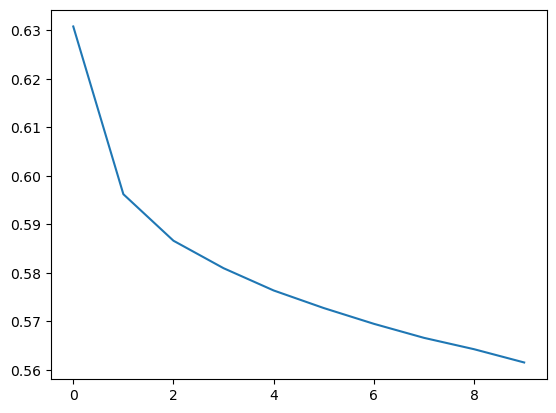

In [168]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

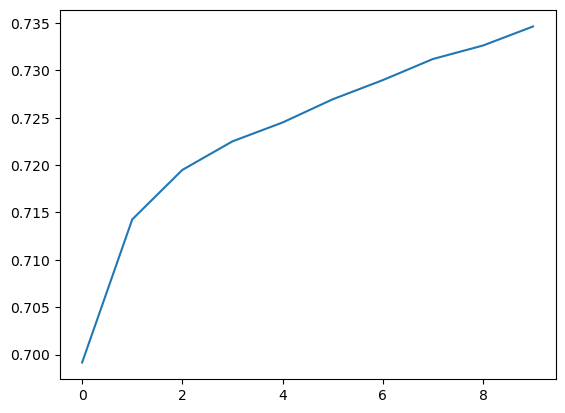

In [169]:
plt.plot(history.history['accuracy'])

In [170]:
y_pred = model.predict(X_test_transformed)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 4s 605us/step


In [171]:
y_pred.argmax(axis=1)

array([1, 1, 2, ..., 1, 2, 1], dtype=int64)

In [172]:
y_pred = y_pred.argmax(axis=1)

In [173]:
from sklearn.metrics import recall_score, classification_report

In [174]:
y_test = y_test - 1
y_test.value_counts()

Severity
1           121247
2            70438
0             7676
3              639
Name: count, dtype: int64

In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.00      0.01      7676
           1       0.78      0.80      0.79    121247
           2       0.66      0.71      0.69     70438
           3       0.00      0.00      0.00       639

    accuracy                           0.74    200000
   macro avg       0.54      0.38      0.37    200000
weighted avg       0.73      0.74      0.72    200000



C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Srijan-DS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
